In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')
clasificadores = ['Benigno','Maligno']

In [51]:
dataframe.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [53]:
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

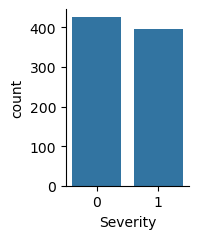

In [55]:
sb.catplot(x = 'Severity',data=dataframe,kind="count",height=2.5,aspect=.8)

In [57]:
y = dataframe['Severity']
x = dataframe.drop('Severity',axis=1)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))


#print(tn, fp, fn, tp)
#sb.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')

print(classification_report(y_test,predicciones,target_names=clasificadores))

         Benigno  Maligno
Benigno      104       15
Maligno       27      100
              precision    recall  f1-score   support

     Benigno       0.79      0.87      0.83       119
     Maligno       0.87      0.79      0.83       127

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



In [61]:
#BIRADS	Edad	Forma	Margen	Densidad
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))

print(knn_mm.predict([[3,30,2,4,3]]))
print(knn_mm.predict_proba([[3,30,2,4,3]]))

print(knn_mm.predict([[5,70,3,5,3]]))
print(knn_mm.predict_proba([[5,70,3,5,3]]))

print(knn_mm.predict([[5,20,2,1,2]]))
print(knn_mm.predict_proba([[5,20,2,1,2]]))

print(knn_mm.predict([[2,70,1,2,4]]))
print(knn_mm.predict_proba([[2,70,1,2,4]]))

print(knn_mm.predict([[5,30,1,5,2]]))
print(knn_mm.predict_proba([[5,30,1,5,2]]))

print(knn_mm.predict([[4,65,1,2,3]]))
print(knn_mm.predict_proba([[4,65,1,2,3]]))

[1]
[[0.4 0.6]]
[0]
[[0.6 0.4]]
[1]
[[0.4 0.6]]
[0]
[[1. 0.]]
[0]
[[0.6 0.4]]
[1]
[[0.4 0.6]]
[0]
[[1. 0.]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: 

In [88]:
dataframe.describe()

,BIRADS,Age,Shape,Margin,Density,Severity
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,4.314634,55.739024,2.775610,2.808537,2.915854,0.481707
std,0.669248,14.684062,1.243647,1.569295,0.351508,0.499970
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


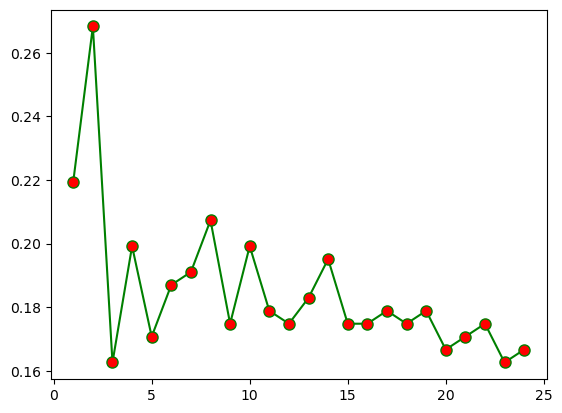

In [90]:
tasa_error=[]
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i=knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i!=y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize='8')